In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import statsmodels.api as sm

from scipy.special import gamma, digamma, gammaln

In [2]:
num_runs = 40

base_path = "data/santander_bikes/"

# alpha
file_path_alpha = base_path + "output/alpha_store_"
alpha_list = []
for i in range(num_runs):
    file_path = file_path_alpha + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    alpha_list.append(data)

# beta
file_path_beta = base_path + "output/beta_store_"
beta_list = []
for i in range(num_runs):
    file_path = file_path_beta + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    beta_list.append(data)

# n
file_path_n = base_path + "output/n_store_"
n_list = []
for i in range(num_runs):
    file_path = file_path_n + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    n_list.append(data)

# tau
file_path_tau = base_path + "output/tau_store_"
tau_list = []
for i in range(num_runs):
    file_path = file_path_tau + f"{i}.pkl"
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    f.close()
    tau_list.append(data)

In [3]:
df_sim_params = pd.read_pickle('data/santander_bikes/df_santander_params.pkl')

Posterior means

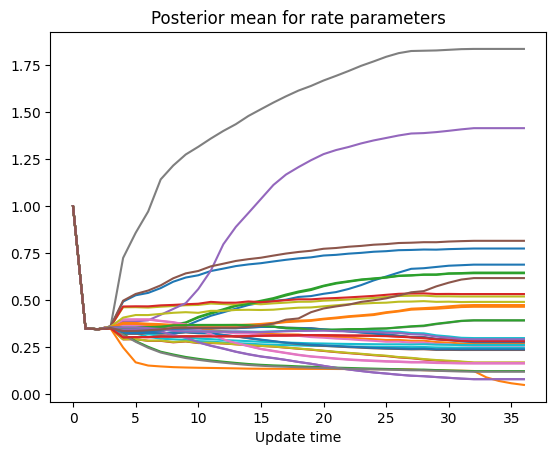

In [4]:
T_max = 38; int_length = 1

# Plot the mean of the posteriors for lambda with iteration number
for index in [38]:
    num_groups = df_sim_params.loc[index, 'num_groups']
    alpha = alpha_list[index]; beta = beta_list[index]
    for j in range(num_groups):
            for k in range(num_groups):
                    plt.plot(np.arange(int(T_max/int_length) - 1),
                            [alpha[i,j,k] / beta[i,j,k] for i in np.arange(T_max - 1)])
            
plt.xlabel("Update time")
# plt.ylabel(r"Posterior means");
plt.title("Posterior mean for rate parameters");

Global group probabilities

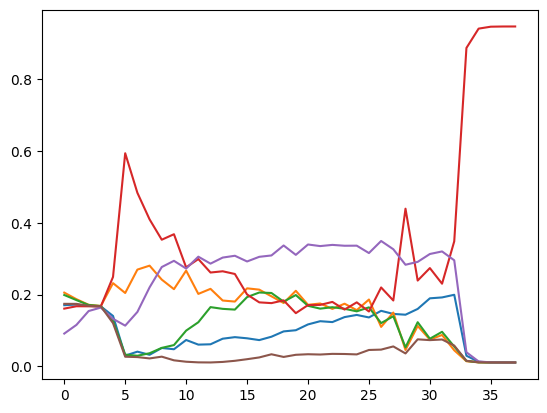

In [5]:
for index in [38]:
    n_store = n_list[index]
    global_prob = n_store / n_store.sum(axis=1, keepdims=True)
    num_groups = df_sim_params.loc[index, 'num_groups'] 
    for group in range(num_groups):
        plt.plot(np.arange(T_max), global_prob[:,group])

Local group probabilities

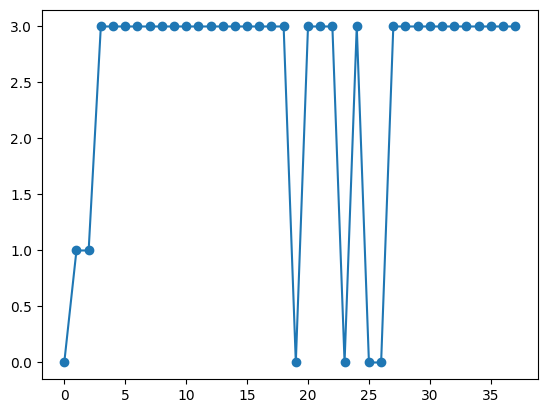

In [27]:
node = 600
for index in [38]:
    tau_store = tau_list[index]
    num_groups = df_sim_params.loc[index, 'num_groups']
    plt.scatter(np.arange(T_max), [np.argmax(tau_store[i,node,:]) for i in range(T_max)])
    plt.plot(np.arange(T_max), [np.argmax(tau_store[i,node,:]) for i in range(T_max)])

Get node memberships

In [37]:
for index in [39]:
    tau_store = tau_list[index]
    num_groups = df_sim_params.loc[index, 'num_groups']
    node_groups_time = np.zeros((38, 803))
    for i in range(T_max):
        node_groups_time[i,:] = np.argmax(tau_store[i,:,:], axis=1)
    

Plot spatial locations coloured by group

In [10]:
santander_map = pickle.load(open("data/santander_bikes/santander_dictionary.pkl", "rb"))
santander_locations = pd.read_csv("data/santander_bikes/santander_locations.csv")

santander_locations['StationName'] = santander_locations['StationName'].map(santander_map)
santander_locations = santander_locations.rename(columns={'StationName': 'node'})
santander_locations = santander_locations[['node', 'longitude', 'latitude']]

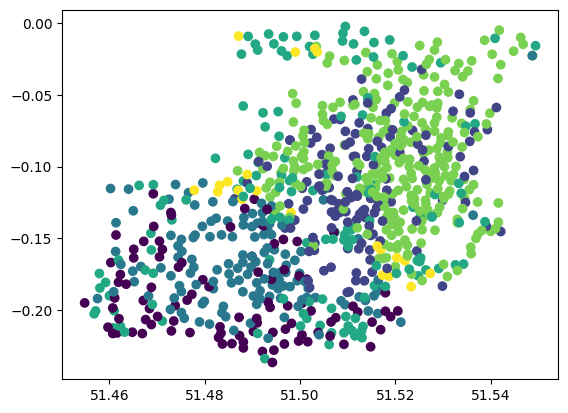

In [11]:
time_t = 22
groups_at_time_t = node_groups_time[time_t, :]
df_groups_at_time_t = pd.DataFrame({'node': np.arange(803),
                                    'group': groups_at_time_t})

df_groups_locations = pd.merge(df_groups_at_time_t, santander_locations, on='node',
                               how='left')

plt.scatter(df_groups_locations['latitude'], df_groups_locations['longitude'],
            c=df_groups_locations['group'])

In [35]:
df_sim_params

,num_nodes,num_groups,n_cavi,delta_z,delta_pi,delta_lam
0,803,2,3,1.0,1.0,1.0
1,803,2,3,1.0,1.0,0.1
2,803,2,3,1.0,0.1,1.0
3,803,2,3,1.0,0.1,0.1
4,803,2,3,0.1,1.0,1.0
5,803,2,3,0.1,1.0,0.1
6,803,2,3,0.1,0.1,1.0
7,803,2,3,0.1,0.1,0.1
8,803,3,3,1.0,1.0,1.0
9,803,3,3,1.0,1.0,0.1


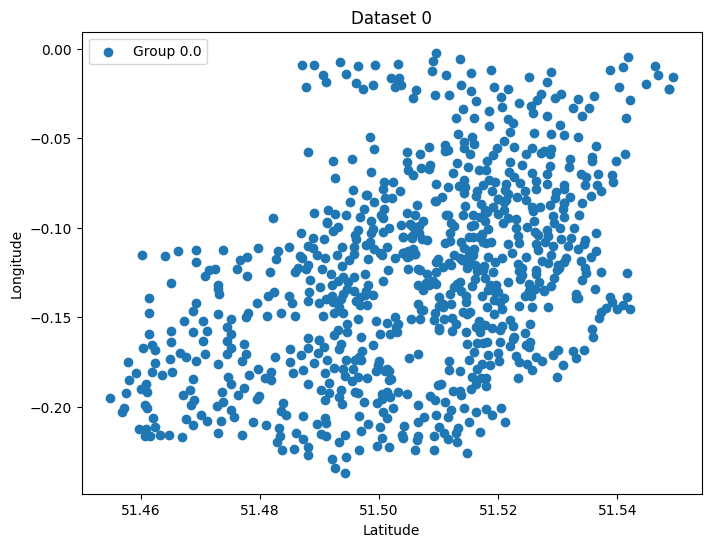

In [39]:
from ipywidgets import interact_manual, IntSlider
import time
from matplotlib.animation import FuncAnimation

num_datasets = 31
datasets = []

for t in range(num_datasets):
    groups_at_time_t = node_groups_time[t, :]
    df_groups_at_time_t = pd.DataFrame({'node': np.arange(803),
                                    'group': groups_at_time_t})
    df_groups_locations = pd.merge(df_groups_at_time_t, santander_locations, on='node',
                               how='left')
    datasets.append(df_groups_locations)

# Create the initial plot
fig, ax = plt.subplots(figsize=(8, 6))

# Function to update the plot
def update_plot(dataset_index):
    ax.clear()  # Clear the previous plot
    for group_id, group_data in datasets[dataset_index].groupby('group'):
        ax.scatter(group_data['latitude'], group_data['longitude'], label=f'Group {group_id}')
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    ax.set_title(f'Dataset {dataset_index}')
    ax.legend()

# Create an animation
def animate(frame):
    update_plot(frame)
    # plt.savefig(f'plot_{frame:03d}.png')  # Save each frame as an image

# Animate the plot for each dataset
ani = FuncAnimation(fig, animate, frames=num_datasets, interval=2000)  # Update every 2 seconds
ani.save('data/santander_bikes/GIFs/memberships_dynamic_plot1.gif', 
         writer='pillow', fps=4)  # Adjust fps as needed

In [13]:
datasets = []

for t in range(38):
    groups_at_time_t = node_groups_time[t, :]
    df_groups_locations = pd.merge(df_groups_at_time_t, santander_locations, on='node',
                               how='left')
    datasets.append(df_groups_locations)